<h2><b>Лабораторная работа №4: Теория вероятностей<b><h2>

<h4><i>Подключение библиотек:</i></h4>

In [58]:
import random
import matplotlib.pyplot as plt

<h4><i>Функция заполнения массива случайными числами</i></h4>

In [59]:
def kubik(n: int) -> list:
    data = []
    while len(data) < n:
        data.append(random.randint(1, 6))
    return data

<h4><i>Функция создания словаря для подсчета количества каждого значения в массиве</i></h4>

In [60]:
def count_rate(kub_data: list, n: int):
    kub_rate = {}
    for i in kub_data:
        if i in kub_rate:
            continue
        else:
            kub_rate[i] = kub_data.count(i)
    for i in range(1, 7):
        if i not in kub_rate:
            kub_rate[i] = 0
    return kub_rate

<h4><i>Функция сортировки словаря</i></h4>

In [61]:
def sort_rate(counted_rate: dict):
    sorted_rate = {}
    for key in sorted(counted_rate.keys()):
        sorted_rate[key] = counted_rate[key]
    return sorted_rate

<h4><i>Создание датафрейма, отображающего количество и частоту выпаданий каждого из значений</i></h4>

In [62]:
import pandas as pd
def create_dataframe(sorted_date: dict):
    df = pd.DataFrame(sorted_date, index=[0])
    df = df.T
    df = df.rename(columns={0: 'Частота'})
    df.insert(0, 'Количество выпаданий', range(1, 1 + len(df)))
    return df

<h4><i>Функция добавления в датафрейм вероятности выпадения каждого из значений</i></h4>

In [63]:
import pandas as pd
def probability_solving(dataframe: pd.DataFrame): 
    sum_rate = dataframe['Частота'].sum()
    probability = []
    for i in dataframe['Частота']:
        probability.append(i / sum_rate)
    dataframe['Вероятность'] = probability
    return dataframe

<h4><i>Создание гистограммы по датафрейму</i></h4>

In [64]:
def create_histogram(dataframe, n, color):
    a = dataframe['Вероятность'].plot(kind='bar', legend=True, color=color)
    plt.title(f'Гистограмма для n = {n}')
    plt.show()

<h4><i>Рассмотрим разные значения n</i></h4>

In [65]:
n_values = [100, 1000, 10000, 1000000]

<h4><i>Добавление библиотеки цветов для гистограмм</i></h4>

In [71]:
import seaborn as sns
colors = sns.color_palette("pastel", len(n_values))

<h4><i>Вывод гистограмм для всех n</i></h4>

   Количество выпаданий  Частота  Вероятность
1                     1       16         0.16
2                     2       23         0.23
3                     3       13         0.13
4                     4       14         0.14
5                     5       15         0.15
6                     6       19         0.19


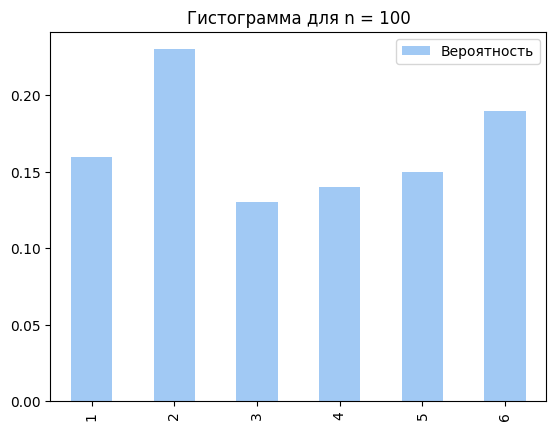

   Количество выпаданий  Частота  Вероятность
1                     1      175        0.175
2                     2      193        0.193
3                     3      160        0.160
4                     4      149        0.149
5                     5      152        0.152
6                     6      171        0.171


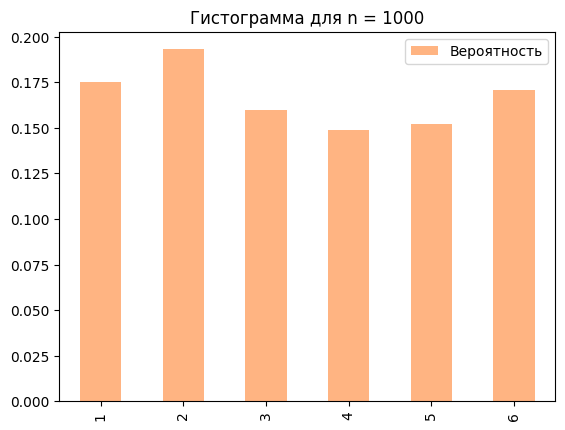

   Количество выпаданий  Частота  Вероятность
1                     1     1695       0.1695
2                     2     1653       0.1653
3                     3     1675       0.1675
4                     4     1631       0.1631
5                     5     1717       0.1717
6                     6     1629       0.1629


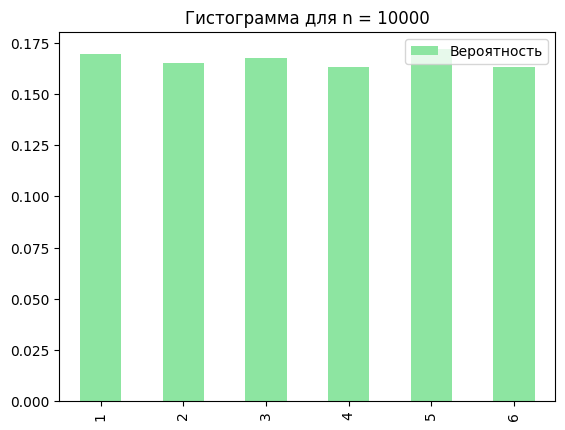

   Количество выпаданий  Частота  Вероятность
1                     1   167141     0.167141
2                     2   167054     0.167054
3                     3   165723     0.165723
4                     4   166676     0.166676
5                     5   167087     0.167087
6                     6   166319     0.166319


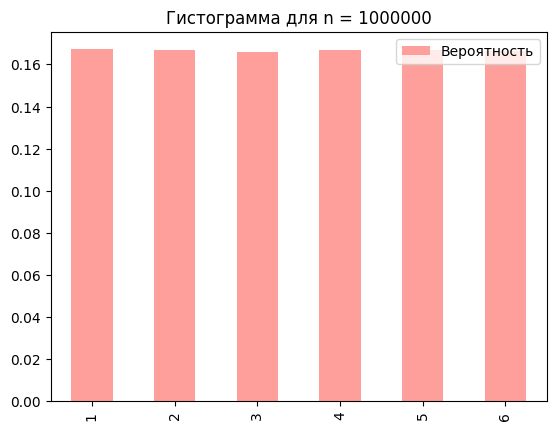

In [74]:
for n, color in zip(n_values, colors):
    kub_data = kubik(n)
    counted_rate = count_rate(kub_data, n)
    sorted_rate = sort_rate(counted_rate)
    df = create_dataframe(sorted_rate)
    df = probability_solving(df)
    print(df)
    create_histogram(df, n, color)
    


<h3>Вывод</h3>
Из графиков видно, что с увеличением количества бросков вероятность выпадения каждого из чисел уравниваются и стремится к 1/6.
Опыт доказывает закон больших чисел.